In [3]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/CEE_501/HW_4'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CEE_501/HW_4


In [4]:
# GOAL: In this assignment, we will try to predict whether the concrete quality
# is good or bad using Neural networks.
import numpy as np
import pandas as pd

# Keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
# Train-Test
from sklearn.model_selection import train_test_split
# Scaling data
from sklearn.preprocessing import StandardScaler, LabelBinarizer
# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical


In [7]:
#### Import Data
# Assuming the data is in a CSV file named 'concrete_data.csv' in the current directory
# Replace 'concrete_data.csv' with the actual filename if it's different
df = pd.read_excel('Concrete_Quality_Binary.xlsx')
display(df.head())

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Concrete Quality
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,Good
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,Good
2,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,Good
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,Good
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,Good


In [8]:
#### Binarize the target label
# Binarize the target label
lb = LabelBinarizer()
df['Concrete Quality'] = lb.fit_transform(df['Concrete Quality'])
display(df.head())

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Concrete Quality
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,1
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,1
2,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,1
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,1
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,1


In [9]:
#### Create X, y and scale X using Standard scaler
# Create X and y
X = df.drop('Concrete Quality', axis=1)
y = df['Concrete Quality']

# Scale X using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
#### Split X and Y into train and test data
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
#### Train the model using Neural networks
# Hints:

# Create the model
model = Sequential()

# 1. Create 2-3 layers for the neural network
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu')) # Added a third layer
model.add(Dense(1, activation='sigmoid'))


## Compile the model
# 2. Use accuracy as the metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7272 - loss: 0.6029
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8793 - loss: 0.5004
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.4234
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9003 - loss: 0.3530
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9197 - loss: 0.2897
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9025 - loss: 0.2850
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9187 - loss: 0.2706
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9425 - loss: 0.2037
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9190 - loss: 0.2278
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9392 - loss: 0.1894
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9440 - loss: 0.1926
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9482 - loss: 0.1653


In [16]:
### Get predictions from the model on X_test
y_pred_proba = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [17]:
#### The model outputs probabilities. Use threshold as 0.5.
# If output > 0.5 then assign as class 1 else 0.
y_pred = (y_pred_proba > 0.5).astype(int)

In [18]:
### Print Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[61  3]
 [ 2 62]]


In [20]:
# Print Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.95      0.97      0.96        64

    accuracy                           0.96       128
   macro avg       0.96      0.96      0.96       128
weighted avg       0.96      0.96      0.96       128



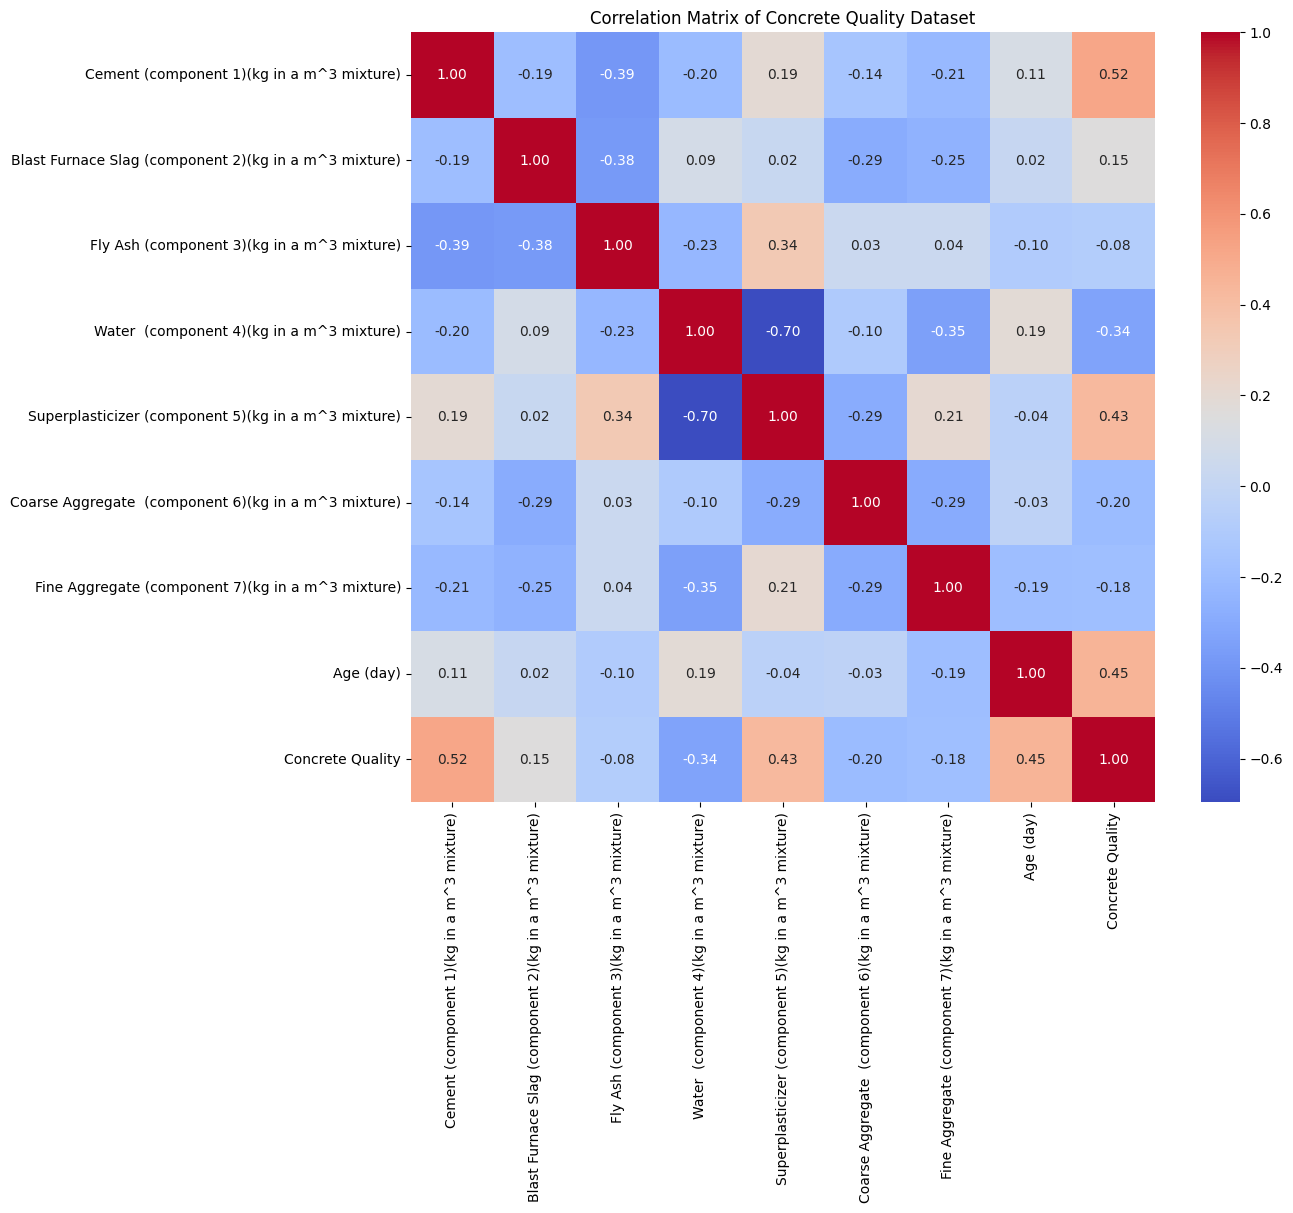

In [27]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Concrete Quality Dataset')
plt.show()

In [24]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 869 (3.40 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 580 (2.27 KB)

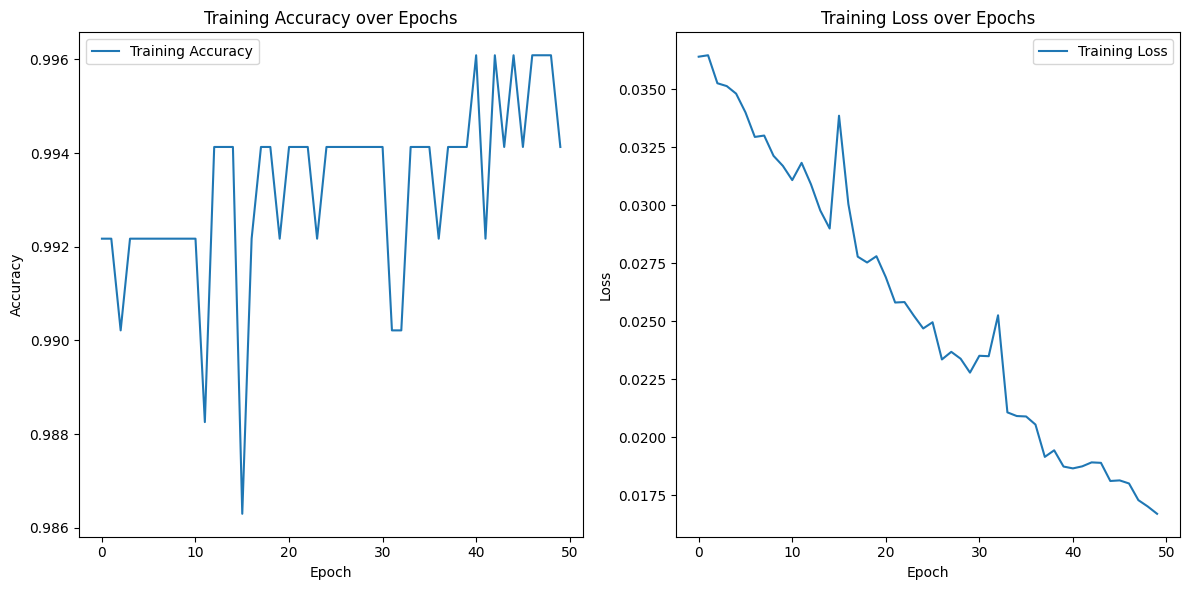

In [28]:
# Access the history object
history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Note: Since validation data was not explicitly provided in model.fit,
# there is no 'val_accuracy' in the history.
# If validation data were provided, we would plot:
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
# Note: Since validation data was not explicitly provided in model.fit,
# there is no 'val_loss' in the history.
# If validation data were provided, we would plot:
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

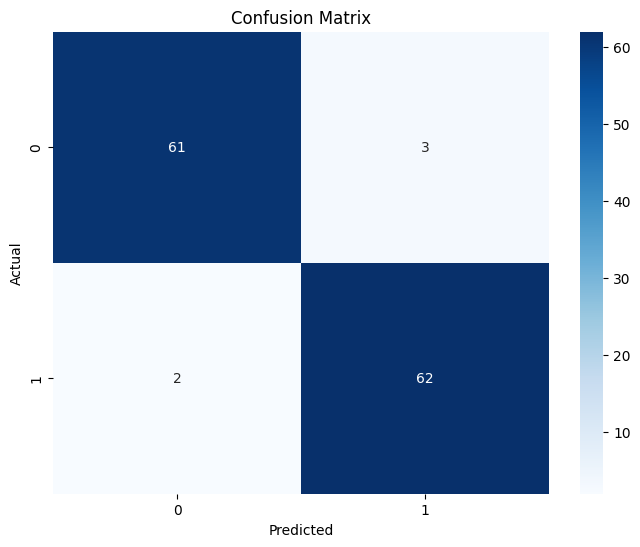

In [26]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()